Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\codsoft\TITANIC\Titanic-Dataset.csv')



In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Some above missing value is present

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

The survived counts from above value count is  342

Text(0, 0.5, 'Count')

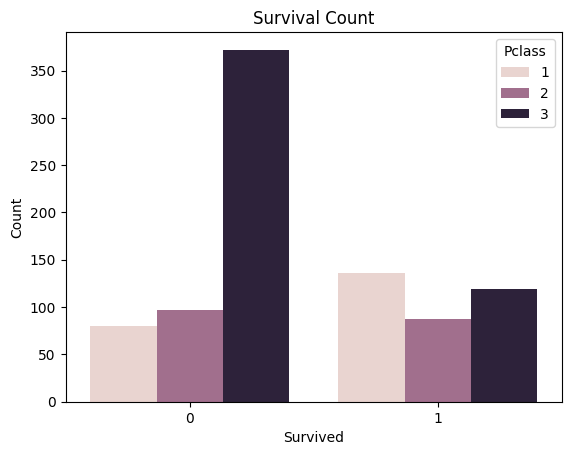

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=df)

plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')


The count of non survival is greater than the count of survival

In [8]:
df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
df = df.drop(['Sex'], axis= 1)

In [14]:
df = df.drop(['Cabin'] , axis=1)

In [15]:
df = df.drop(['Embarked'] , axis=1)

Text(0, 0.5, 'Count')

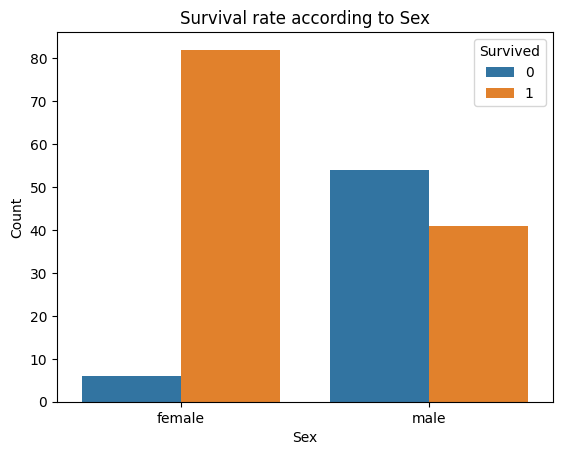

In [11]:
sns.countplot(x= 'Sex' , hue = 'Survived',data = df)

plt.title('Survival rate according to Sex')

plt.xlabel('Sex')
plt.ylabel('Count')

In [12]:
X= df[['Pclass', 'Sex']]
Y= df['Survived']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train , Y_Test  = train_test_split(X,Y, test_size = 0.2 , random_state = 0)


In [14]:
print(X_train.isnull().sum())
print(Y_train.isnull().sum())


Pclass    0
Sex       0
dtype: int64
0


In [66]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})


In [76]:
print(X_train.dtypes)
print(X_train.head())


Sex       float64
Pclass      int64
dtype: object
     Sex  Pclass
105  NaN       3
68   NaN       3
253  NaN       3
320  NaN       3
706  NaN       2


In [22]:

from sklearn.linear_model import LogisticRegression
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

df = df.fillna(0)

X = df[['Sex', 'Pclass']]
Y = df['Survived']


log = LogisticRegression(random_state= 0)
log.fit(X_train, Y_train) 


LogisticRegression(random_state=0)

In [23]:
pred = print(log.predict(X_test))
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
None


In [24]:
print(Y_test)

473    1
110    0
195    1
492    0
835    1
806    0
27     0
681    1
319    1
366    1
21     1
550    1
871    1
632    1
781    1
717    1
581    1
520    1
394    1
742    1
341    1
305    1
218    1
707    1
11     1
332    0
453    1
879    1
262    0
452    0
540    1
327    1
151    1
318    1
820    1
759    1
52     1
257    1
486    1
630    1
430    1
299    1
139    0
183    1
487    0
307    1
Name: Survived, dtype: int64


In [30]:
import warnings
warnings.filterwarnings("ignore")

res = log.predict([[2,0]])

if(res==0):
    print("So sorry ! Not Survived")
else:
    print("Survived")

Survived
